In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import bagpy
import rosbag
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [28]:
test= pd.read_csv('2020-01-25-18-09-47/vesc-odom.csv')
test

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.606875e+09,72523,1606874987,386141624,odom,base_link,-0.691765,-2.637654,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.606875e+09,72524,1606874987,406061016,odom,base_link,-0.691765,-2.637654,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.606875e+09,72525,1606874987,426103256,odom,base_link,-0.691765,-2.637654,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.606875e+09,72526,1606874987,446142680,odom,base_link,-0.691765,-2.637654,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.606875e+09,72527,1606874987,466075480,odom,base_link,-0.691765,-2.637654,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1.606875e+09,73331,1606875003,546323096,odom,base_link,-19.009103,-7.331210,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
809,1.606875e+09,73332,1606875003,566097368,odom,base_link,-19.009103,-7.331210,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
810,1.606875e+09,73333,1606875003,586080024,odom,base_link,-19.009103,-7.331210,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
811,1.606875e+09,73334,1606875003,606073624,odom,base_link,-19.009103,-7.331210,0.0,0.0,...,-0.992145,0.125091,"(0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.0,0.0,0.0,0.0,0.0,-0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
od_data = pd.read_csv('../data/raw/Odometry.csv')
od_data['x']

0      -0.691765
1      -0.691765
2      -0.691765
3      -0.691765
4      -0.691765
         ...    
808   -19.009103
809   -19.009103
810   -19.009103
811   -19.009103
812   -19.009103
Name: x, Length: 813, dtype: float64

When looking at odometry, the values we need are the position coordinates, the angular velocity, and time.

In [20]:
data = od_data[['x','y','w','secs']]

Since our seconds are not standardized at zero, we set the first time value to zero and subtract that value to every other value.

In [21]:
data['secs'] = data['secs'] - 1606874987

/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


To calculate odometry positions, we have to have find the change in velocity since the F110th framework did not provide us velocity.

In [22]:
s = pd.Series(data['x'])
data['delta_x'] = (s.diff() * data['secs'])
s = pd.Series(data['y'])
data['delta_y'] = (s.diff() * data['secs'])

/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
delta_x = [j-i for i, j in zip(data['x'][:-1], data['x'][1:])]
delta_y = [j-i for i, j in zip(data['y'][:-1], data['y'][1:])]
delta_x.insert(0,0)
delta_y.insert(0,0)

data['delta_x'] = delta_x
data['delta_y'] = delta_y

/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
data

,x,y,w,secs,delta_x,delta_y
0,-0.691765,-2.637654,0.125091,0,0.0,0.0
1,-0.691765,-2.637654,0.125091,0,0.0,0.0
2,-0.691765,-2.637654,0.125091,0,0.0,0.0
3,-0.691765,-2.637654,0.125091,0,0.0,0.0
4,-0.691765,-2.637654,0.125091,0,0.0,0.0
...,...,...,...,...,...,...
808,-19.009103,-7.331210,0.125091,16,0.0,0.0
809,-19.009103,-7.331210,0.125091,16,0.0,0.0
810,-19.009103,-7.331210,0.125091,16,0.0,0.0
811,-19.009103,-7.331210,0.125091,16,0.0,0.0


Now that we have velocity, we have the values we need to calculate the change in position_x and change in position_y.

In [25]:
pos_x = []
pos_y = []
def convert(data):
    delta_x = ((data['delta_x'] * math.cos(data['w'] * data['secs'])) - 
               ((data['delta_y'] * math.sin(data['w'] * data['secs'])))) * data['secs']
    delta_y = ((data['delta_x'] * math.sin(data['w'] * data['secs'])) - 
           ((data['delta_x'] * math.cos(data['w'] * data['secs'])))) * data['secs']
    pos_x.append(delta_x)
    pos_y.append(delta_y)

data.apply(convert,axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
808    None
809    None
810    None
811    None
812    None
Length: 813, dtype: object

In [26]:
data['pos_x'] = pos_x
data['pos_y'] = pos_y

/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Many values are repeats because our robot reports data even though there is no change, so to ensure we did the calculations right, we checked for all unique values to see when the robot moved.

In [ ]:
data['pos_y'].unique()

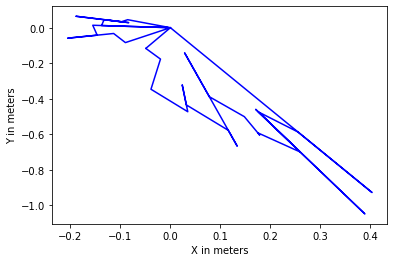

In [35]:
plt.plot(pos_x, pos_y,'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.show()

The graph above shows the pathing the robot took from the start at (0,0). We can see that based on the pathing, the car went back and forth very often since there are many points where there 

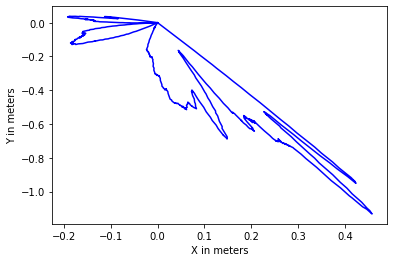

odom plot success!


In [43]:
df_odom = pd.read_csv('2020-12-01-18-09-47/vesc-odom.csv')
df_odom['secs'] = df_odom['Time'] - 1606874987
s = pd.Series(df_odom['pose.pose.position.x'])
df_odom['delta_x'] = (s.diff() * df_odom['secs'])
s = pd.Series(df_odom['pose.pose.position.y'])
df_odom['delta_y'] = (s.diff() * df_odom['secs'])
delta_x = [j-i for i, j in zip(df_odom['pose.pose.position.x'][:-1], df_odom['pose.pose.position.x'][1:])]
delta_y = [j-i for i, j in zip(df_odom['pose.pose.position.y'][:-1], df_odom['pose.pose.position.y'][1:])]
delta_x.insert(0,0)
delta_y.insert(0,0)

df_odom['delta_x'] = delta_x
df_odom['delta_y'] = delta_y
pos_x = []
pos_y = []
def convert(data):
    delta_x = ((data['delta_x'] * math.cos(data['pose.pose.orientation.w'] * data['secs'])) - 
               ((data['delta_y'] * math.sin(data['pose.pose.orientation.w'] * data['secs'])))) * data['secs']
    delta_y = ((data['delta_x'] * math.sin(data['pose.pose.orientation.w'] * data['secs'])) - 
           ((data['delta_x'] * math.cos(data['pose.pose.orientation.w'] * data['secs'])))) * data['secs']
    #print(delta_y)
    pos_x.append(delta_x)
    pos_y.append(delta_y)
df_odom.apply(convert,axis = 1)
#print(pos_x)
df_odom['pos_x'] = pos_x
df_odom['pos_y'] = pos_y
plt.plot(pos_x, pos_y,'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.show()
print('odom plot success!')

Tuning values we used to test ERPM.

In [11]:
erpm = [2.418573, 2.72192, 3.0153, 2.1984, 2.0407]
tuning = pd.DataFrame(data = erpm, index = ['4412','4912','5412','3912','3412'], columns =  ['distance'])

In [12]:
tuning['off_by'] = tuning['distance'] - 2.0

In [14]:
print(tuning)

      distance    off_by
4412  2.418573  0.418573
4912  2.721920  0.721920
5412  3.015300  1.015300
3912  2.198400  0.198400
3412  2.040700  0.040700
